# Analysis of mouse weights

In [1]:
import sys
sys.path.append('..')
import os
from itertools import chain
from collections import defaultdict
import shelve
from tqdm import tqdm
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from scripts import utils
from scripts.analysis import build_loci
from scripts.analysis.DBInfo import DBInfo

BASE = '../data'

db_info = DBInfo("compil_mgm")
metadata = build_loci.read_metadata(os.path.join(BASE,"metadata.csv"))

In [2]:
dat1 = pd.read_csv(os.path.join(BASE, 'SILAM-Weight-Data.csv'))

In [3]:
dat1.head()

,Day,333.RT.1,334.RT.1,335.RT.1,336.RT.1,337.RT.1,338.RT.2,339.RT.2,340.RT.2,341.RT.2,...,343.RAG.3,344.RAG.3,345.RAG.3,346.RAG.3,347.RAG.3,348.RAG.4,350.RAG.4,351.RAG.4,352.RAG.4,353.RAG.4
0,0.0,1.0,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.00,1.000000,1.000000
1,1.0,1.0,0.982249,1.005988,1.0,0.977401,1.012346,1.017341,1.012195,0.969849,...,1.005495,1.005618,1.0,1.005155,0.983333,1.023669,1.015385,1.01,1.022099,1.016949
2,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
mice= list(dat1.columns)
mice.pop(0)

dat1 = (pd.melt(dat1, id_vars=['Day'], value_vars = mice)
         .dropna(subset=['value'])
         .rename(columns={'variable': 'mouse', 'value': 'weight'}))

In [5]:
dat1['weight'] = dat1['weight'] * 100
dat1['cage'] = dat1['mouse'].str.split('.', expand=True)[2]
dat1['cohort'] = dat1['mouse'].str.split('.', expand=True)[1]
dat1['mouse'] = dat1['mouse'].str.split('.', expand=True)[0]

In [6]:
dat1

,Day,mouse,weight,cage,cohort
0,0.0,333,100.000000,1,RT
1,1.0,333,100.000000,1,RT
5,5.0,333,98.421053,1,RT
7,7.0,333,97.368421,1,RT
9,9.0,333,97.368421,1,RT
12,12.0,333,98.421053,1,RT
13,13.0,333,97.894737,1,RT
14,14.0,333,101.578947,1,RT
16,16.0,333,97.368421,1,RT
19,19.0,333,78.421053,1,RT


/Users/mmayers/projects/n15_mice/venv/lib/python3.5/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


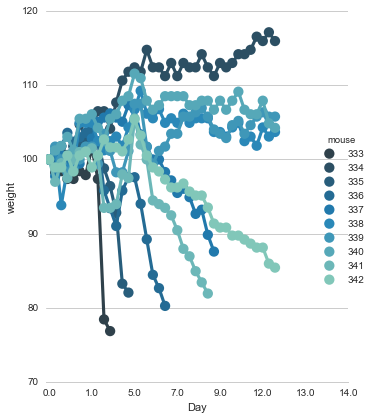

In [7]:
sns.set_style('whitegrid')

g = sns.factorplot(x="Day", y="weight", hue="mouse", data=dat1.query('cohort == "RT"'), capsize=.2, palette="YlGnBu_d", size=6, aspect=.75)
g.despine(left=True)

plt.xticks([i for i in range(0, 56, 7)]);

This is both slow to compute and looks ugly, lets try with vanilla matplotlib

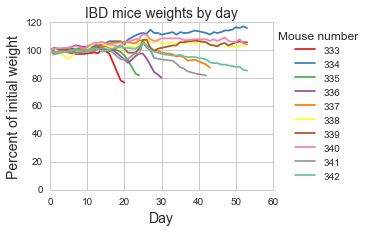

In [8]:
sns.set_style('whitegrid')

fig = plt.figure(figsize=(4,3))
fig.set_tight_layout(False)

ibd_mice = sorted(list(set(dat1.query('cohort == "RT"')['mouse'])))
colors = sns.color_palette('Set1', 9)+ sns.color_palette('Set2')

for i, mouse in enumerate(ibd_mice):
    data = dat1.query('mouse == "{}"'.format(mouse))
    
    plt.plot(data['Day'],data['weight'], color=colors[i], label=str(mouse))
    

plt.legend(title='Mouse number', loc = 8, bbox_to_anchor=(1.2, 0))
plt.xlabel('Day', size=14)
plt.ylabel('Percent of initial weight', size=14)
plt.title('IBD mice weights by day', size=14)
plt.ylim(0,120)
plt.savefig(os.path.join(BASE, 'weight_plot_IBD_individual.svg'))

### Find out what day each mouse died

In [9]:
for mouse in sorted(list(set(dat1['mouse']))):
    print(mouse, dat1.query('mouse == "{}"'.format(mouse))['Day'].max())

333 20.0
334 53.0
335 24.0
336 30.0
337 43.0
338 53.0
339 53.0
340 53.0
341 42.0
342 53.0
343 20.0
344 53.0
345 53.0
346 53.0
347 53.0
348 53.0
350 53.0
351 53.0
352 53.0
353 53.0


In [10]:
grpd = dat1.groupby(['cohort', 'Day'])
dat2 = grpd.mean()
dat2['sem'] = grpd.agg(stats.sem)
dat2 = dat2.reset_index()

/Users/mmayers/projects/n15_mice/venv/lib/python3.5/site-packages/scipy/stats/stats.py:257: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


In [11]:
days = [i for i in range(0, 55, 7)] + [53]

In [12]:
dat3 = dat2.query('Day in {}'.format(days))

In [13]:
sibd = dat3.query('cohort == "RT"').reset_index(drop=True)
srag = dat3.query('cohort == "RAG"').reset_index(drop=True)

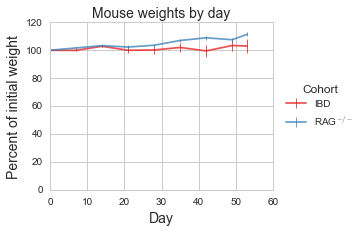

In [14]:
sns.set_style('whitegrid')

fig = plt.figure(figsize=(4,3))
fig.set_tight_layout(False)

plt.errorbar(sibd['Day'],sibd['weight'],yerr=sibd['sem'],fmt='-',color=colors[0], elinewidth=1, alpha=0.75, label='IBD')
plt.errorbar(srag['Day'],srag['weight'],yerr=srag['sem'],fmt='-',color=colors[1], elinewidth=1, alpha=0.75, label='RAG${}^{-/-}$')

plt.legend(title = 'Cohort', loc = 5, bbox_to_anchor=(1.4,.5))
plt.xlabel('Day', size=14)
plt.ylabel('Percent of initial weight', size=14)
plt.title('Mouse weights by day', size=14)
plt.ylim(0,120)
plt.savefig(os.path.join(BASE, 'weight_plot_avgs.svg'))